<a href="https://colab.research.google.com/github/smcd253/imgRecognition_cnn/blob/master/mnistCnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

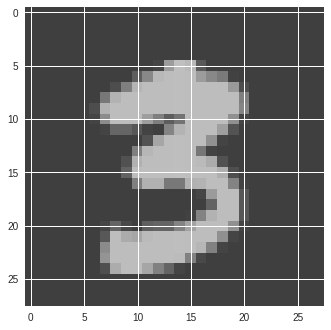

    3


In [29]:
# -*- coding: utf-8 -*-
"""
Training a Classifier
=====================
This is it. You have seen how to define neural networks, compute loss and make
updates to the weights of the network.
Now you might be thinking,
What about data?
----------------
Generally, when you have to deal with image, text, audio or video data,
you can use standard python packages that load data into a numpy array.
Then you can convert this array into a ``torch.*Tensor``.
-  For images, packages such as Pillow, OpenCV are useful
-  For audio, packages such as scipy and librosa
-  For text, either raw Python or Cython based loading, or NLTK and
   SpaCy are useful
Specifically for vision, we have created a package called
``torchvision``, that has data loaders for common datasets such as
Imagenet, CIFAR10, MNIST, etc. and data transformers for images, viz.,
``torchvision.datasets`` and ``torch.utils.data.DataLoader``.
This provides a huge convenience and avoids writing boilerplate code.
For this tutorial, we will use the CIFAR10 dataset.
It has the classes: ‘airplane’, ‘automobile’, ‘bird’, ‘cat’, ‘deer’,
‘dog’, ‘frog’, ‘horse’, ‘ship’, ‘truck’. The images in CIFAR-10 are of
size 3x32x32, i.e. 3-channel color images of 32x32 pixels in size.
.. figure:: /_static/img/cifar10.png
   :alt: cifar10
   cifar10
Training an image classifier
----------------------------
We will do the following steps in order:
1. Load and normalizing the CIFAR10 training and test datasets using
   ``torchvision``
2. Define a Convolutional Neural Network
3. Define a loss function
4. Train the network on the training data
5. Test the network on the test data
1. Loading and normalizing CIFAR10
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Using ``torchvision``, it’s extremely easy to load CIFAR10.
"""
import torch
import torchvision
import torchvision.transforms as transforms

########################################################################
# The output of torchvision datasets are PILImage images of range [0, 1].
# We transform them to Tensors of normalized range [-1, 1].

batchSize = 1

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,), (1.0,))])

trainset = torchvision.datasets.MNIST(root='/Users/SwaggySpencerMcDee/Documents/ee569/MNIST', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batchSize,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.MNIST(root='/Users/SwaggySpencerMcDee/Documents/ee569/MNIST', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batchSize,
                                         shuffle=False, num_workers=2)

classes = (0, 1, 2, 3, 4, 5, 6, 7, 8, 9)

########################################################################
# Let us show some of the training images, for fun.

import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(batchSize)))

In [0]:
########################################################################
# 2. Define a Convolutional Neural Network
# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
# Copy the neural network from the Neural Networks section before and modify it to
# take 3-channel images (instead of 1-channel images as it was defined).

import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5, stride = 1, padding = 0)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5, stride = 1, padding = 0)
        self.fc1 = nn.Linear(256 * batchSize, 120)
        self.fc2 = nn.Linear(120, 80)
        self.fc3 = nn.Linear(80, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 256 * batchSize)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [0]:
########################################################################
# 3. Define a Loss function and optimizer
# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
# Let's use a Classification Cross-Entropy loss and SGD with momentum.

import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [32]:
########################################################################
# 4. Train the network
# ^^^^^^^^^^^^^^^^^^^^
#
# This is when things start to get interesting.
# We simply have to loop over our data iterator, and feed the inputs to the
# network and optimize.

#target GPU
# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# print(device)
# net.to(device) # transfer netwrok to gpu

# ADDED BY TA
# net.train() # sets model to training mode (if you have drouout and BN, Batch Nom)

for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    # iterate over data
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        # transfer to gpu
        # inputs, labels = inputs.to(device), labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward() # back-propogate loss
        optimizer.step() # update weight

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 1.977
[1,  4000] loss: 0.572
[1,  6000] loss: 0.339
[1,  8000] loss: 0.220
[1, 10000] loss: 0.213
[1, 12000] loss: 0.181
[1, 14000] loss: 0.169
[1, 16000] loss: 0.127
[1, 18000] loss: 0.158
[1, 20000] loss: 0.162
[1, 22000] loss: 0.135
[1, 24000] loss: 0.131
[1, 26000] loss: 0.108
[1, 28000] loss: 0.077
[1, 30000] loss: 0.109
[1, 32000] loss: 0.099
[1, 34000] loss: 0.093
[1, 36000] loss: 0.092
[1, 38000] loss: 0.096
[1, 40000] loss: 0.100
[1, 42000] loss: 0.089
[1, 44000] loss: 0.118
[1, 46000] loss: 0.101
[1, 48000] loss: 0.079
[1, 50000] loss: 0.082
[1, 52000] loss: 0.088
[1, 54000] loss: 0.091
[1, 56000] loss: 0.094
[1, 58000] loss: 0.055
[1, 60000] loss: 0.068
[2,  2000] loss: 0.057
[2,  4000] loss: 0.064
[2,  6000] loss: 0.072
[2,  8000] loss: 0.056
[2, 10000] loss: 0.083
[2, 12000] loss: 0.057
[2, 14000] loss: 0.063
[2, 16000] loss: 0.079
[2, 18000] loss: 0.070
[2, 20000] loss: 0.061
[2, 22000] loss: 0.070
[2, 24000] loss: 0.066
[2, 26000] loss: 0.068
[2, 28000] 

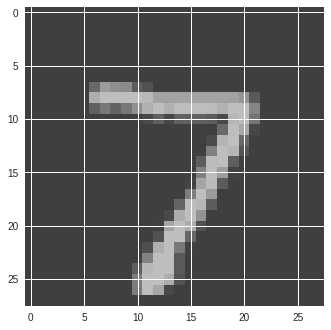

GroundTruth:      7
Predicted:      7


In [33]:
#######################################################################
# 5. Test the network on the test data
# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
#
# We have trained the network for 2 passes over the training dataset.
# But we need to check if the network has learnt anything at all.
#
# We will check this by predicting the class label that the neural network
# outputs, and checking it against the ground-truth. If the prediction is
# correct, we add the sample to the list of correct predictions.
#
# Okay, first step. Let us display an image from the test set to get familiar.

dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(batchSize)))

########################################################################
# Okay, now let us see what the neural network thinks these examples above are:

outputs = net(images)

########################################################################
# The outputs are energies for the 10 classes.
# The higher the energy for a class, the more the network
# thinks that the image is of the particular class.
# So, let's get the index of the highest energy:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(batchSize)))

In [34]:
########################################################################
# The results seem pretty good.
#
# Let us look at how the network performs on the whole dataset.

correct = 0
total = 0
# net.eval()
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 98 %
